# Employee Turnover Predictor

This project provides analysis and prediction model for employee turnover using human resources data. It uses various data analysis techniques and machine learning models to gain insights into employee data and predict whether an employee is likely to leave the company.

In [477]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [478]:
df = pd.read_csv("hr_data.csv")

## Data preparation

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_of_projects     14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   years_at_company       14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [480]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [481]:
df.duplicated(keep="first").sum()

3008

In [482]:
df.drop_duplicates(inplace=True)

In [483]:
df.shape

(11991, 10)

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_of_projects     11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   years_at_company       11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


## EDA

### Monthly hours

Examines the distribution of the "average_monthly_hours" feature, which represents the average number of hours an employee worked per month. It starts by displaying the unique values of the feature to get an idea of the range of values. Then, it creates a histogram and a KDE (Kernel Density Estimation) plot using seaborn and matplotlib to visualize the distribution of monthly hours.

In [485]:
df['average_monthly_hours'].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [486]:
bins = len(df['average_monthly_hours'].unique())
bins

215

Text(0.5, 1.0, 'Hours Worked Monthly')

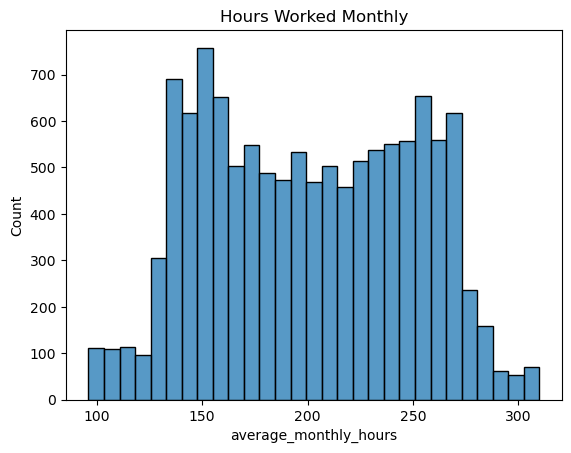

In [487]:
sns.histplot(data=df, x='average_monthly_hours')
plt.title('Hours Worked Monthly')

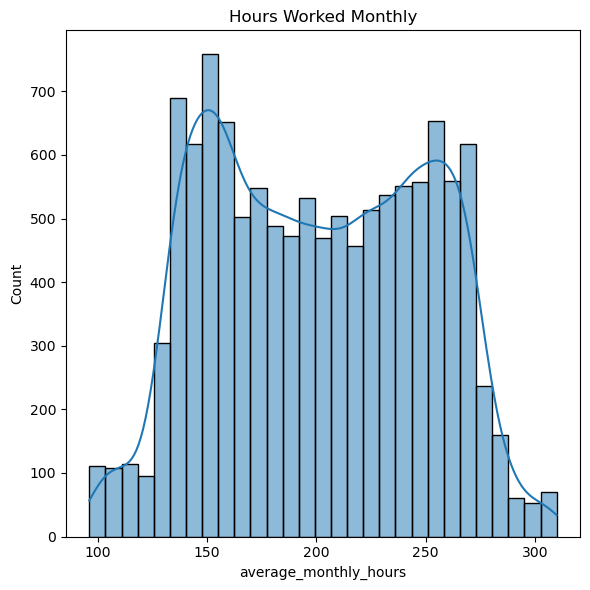

In [488]:
plt.figure(figsize=(6, 6))
sns.histplot(data=df, x=df['average_monthly_hours'], kde=True)
plt.title('Hours Worked Monthly')
plt.tight_layout()
plt.show()

### Number of projects

Analyzes the distribution of the "number_of_projects" feature, which indicates the number of projects an employee has worked on. It displays the count of each project number using a count plot from the seaborn library.

In [489]:
df['number_of_projects'].value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_of_projects, dtype: int64

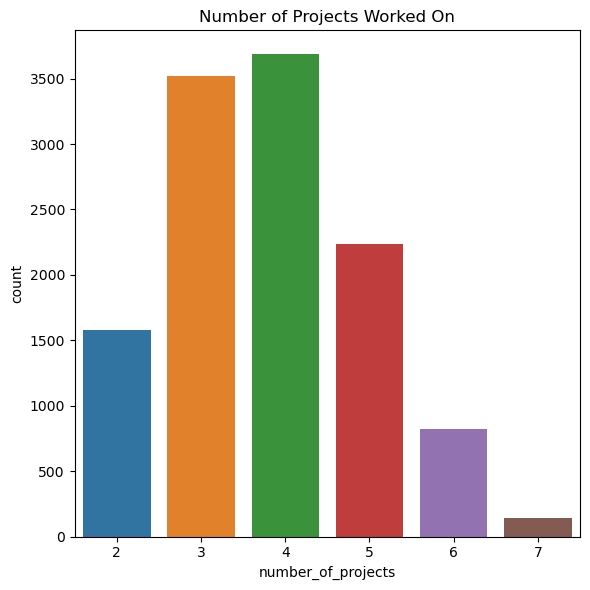

In [490]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='number_of_projects')
plt.title('Number of Projects Worked On')
plt.tight_layout()
plt.show()

### Promotion in last 5 years

Visualizes the proportion of employees who were promoted in the last 5 years using a pie chart. It calculates the count of employees who were promoted and not promoted and represents the proportions as slices in the pie chart.

In [491]:
df['promotion_last_5years'].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [492]:
labels = df['promotion_last_5years'].value_counts().index.tolist()
labels

[0, 1]

In [493]:
labels = ['Promoted' if i == 1 else 'Not Promoted' for i in labels]
labels

['Not Promoted', 'Promoted']

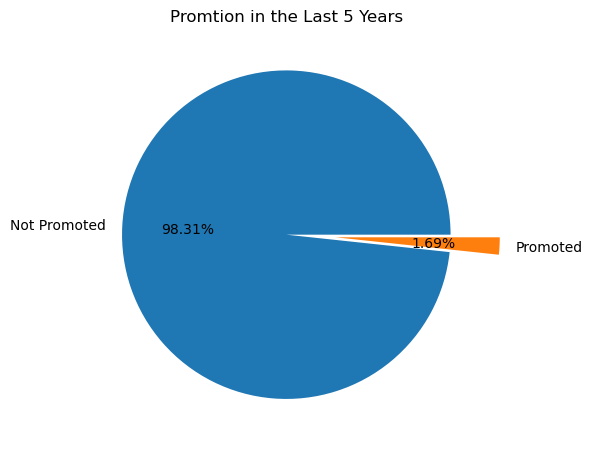

In [494]:
plt.figure(figsize=(6, 6))
plt.pie(x = df['promotion_last_5years'].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promtion in the Last 5 Years")
plt.tight_layout()
plt.show()

### Work accidents

Displays the proportion of employees who experienced a work accident using a pie chart. It calculates the count of employees who had a work accident and those who did not and represents the proportions as slices in the pie chart.

In [495]:
df['work_accident'].value_counts() 

0    10141
1     1850
Name: work_accident, dtype: int64

In [496]:
labels = df['work_accident'].value_counts().index.tolist()
labels

[0, 1]

In [497]:
labels = ['Work Accident' if i == 1 else 'No Work Accident' for i in labels]
labels

['No Work Accident', 'Work Accident']

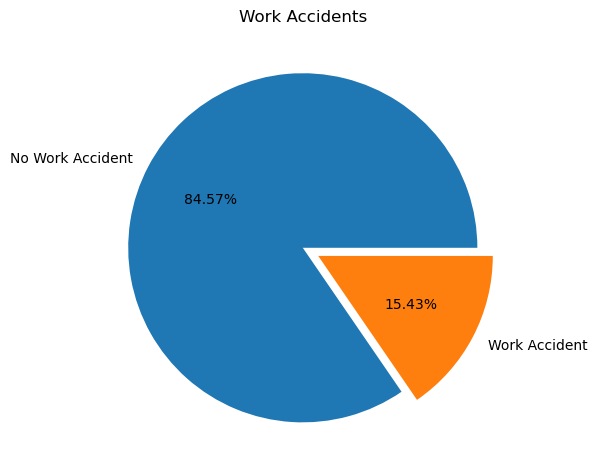

In [498]:
plt.figure(figsize=(6, 6))
plt.pie(x = df['work_accident'].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.1])
plt.title("Work Accidents")
plt.tight_layout()
plt.show()

### Years at company

The distribution of the "years_at_company" feature, which represents the number of years an employee has been with the company. It uses a count plot to display the number of employees for each year category.

In [499]:
df['years_at_company'].value_counts() 

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: years_at_company, dtype: int64

In [500]:
labels = df['years_at_company'].value_counts().index.tolist()
labels

[3, 2, 4, 5, 6, 10, 7, 8]

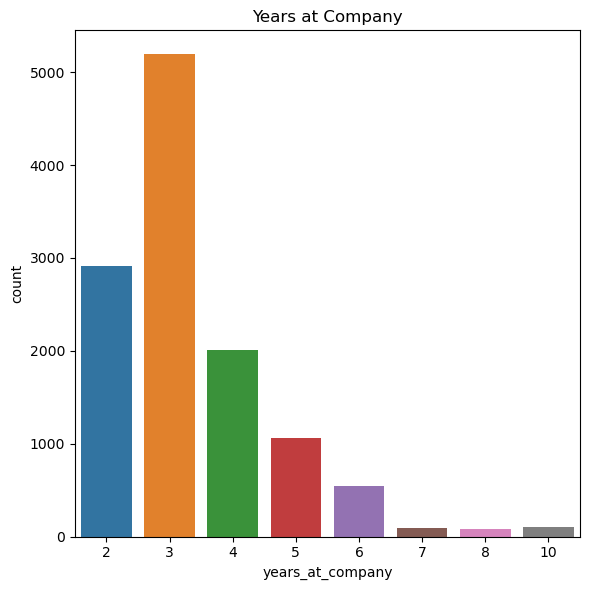

In [501]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'years_at_company', data=df)
plt.title("Years at Company")
plt.tight_layout()
plt.show()


In [502]:
df['years_at_company'].mean() #Average years pent at company

3.3648569760653824

### Department comparison

Number of employees in each department using a count plot. It displays the count of employees in each department category on the x-axis and the corresponding frequency on the y-axis.

In [503]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [504]:
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

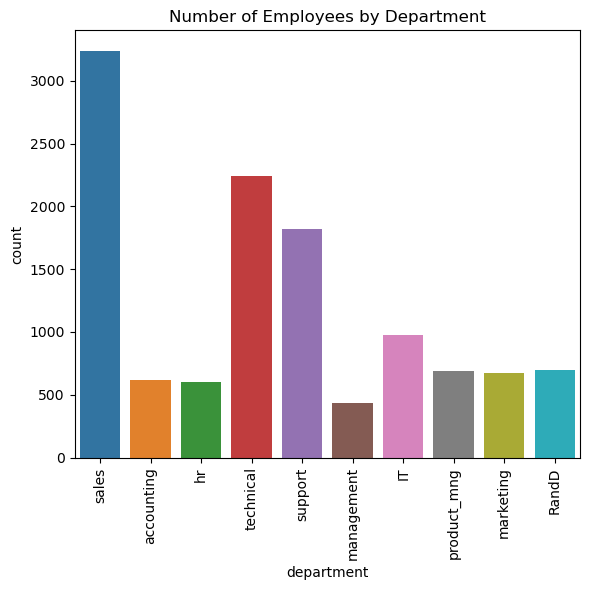

In [505]:
plt.figure(figsize=(6, 6))
sns.countplot(x = 'department', data=df)
plt.title("Number of Employees by Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Salary Category

Distribution of employees across different salary levels using a pie chart. It calculates the count of employees in each salary category and represents the proportions as slices in the pie chart.

The ranges are general but the brackets could be applied to any salary distribution within a company.

In [506]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [507]:
df['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [508]:
labels = df['salary'].value_counts().index.tolist()
labels

['low', 'medium', 'high']

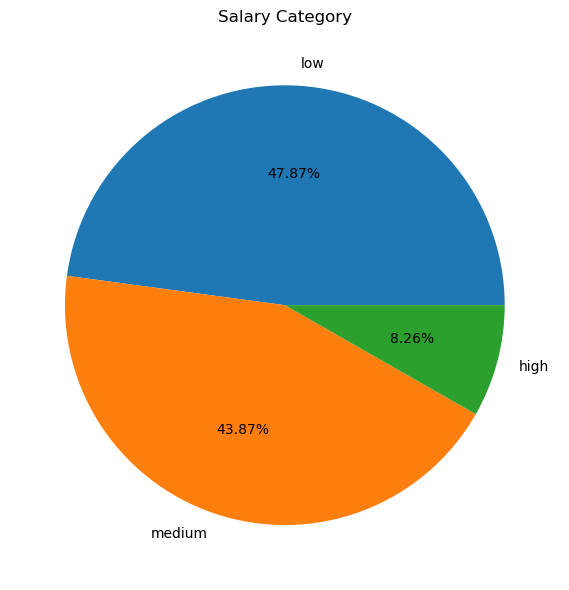

In [509]:
plt.figure(figsize=(6, 6))
plt.pie(x = df['salary'].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Category")
plt.tight_layout()
plt.show()

## Data preprocessing

The code performs data preprocessing steps before training the models. Data preprocessing is necessary to transform the data into a suitable format for the machine learning models. The column "salary" is renamed to "salary_level" in order to provide a more descriptive and consistent name for the column.

In [510]:
df.rename(columns={'salary': 'salary_level'}, inplace=True)

In [511]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary_level'],
      dtype='object')

### Categorical encoding

This code performs one-hot encoding on the categorical features "department" and "salary_level" using the 'pd.get_dummies()' function. One-hot encoding converts categorical variables into binary vectors, making them suitable for machine learning algorithms. The encoded columns are then added to the dataframe.

In [512]:
categorical_cols = ['department', 'salary_level']
encoded_cols = pd.get_dummies(df[categorical_cols], prefix='cat')

In [513]:
encoded_cols

,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,1,0,0,0,0,0,1,0,0
11996,0,0,0,0,1,0,0,0,0,0,1,0,0
11997,0,0,0,0,1,0,0,0,0,0,1,0,0
11998,0,0,0,0,0,1,0,0,0,0,1,0,0


In [514]:
df = df.join(encoded_cols)

In [515]:
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary_level,...,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [516]:
df.drop(['department', 'salary_level'], inplace=True, axis='columns')

In [517]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'cat_IT', 'cat_RandD', 'cat_accounting',
       'cat_hr', 'cat_management', 'cat_marketing', 'cat_product_mng',
       'cat_sales', 'cat_support', 'cat_technical', 'cat_high', 'cat_low',
       'cat_medium'],
      dtype='object')

### Min-Max Scaling

This code performs min-max scaling on the "average_monthly_hours" feature to normalize its values. Min-max scaling scales the values of a feature to a fixed range, preserving the relative relationships between the data points. This scaling can ensure that the feature does not dominate the model training process.

"average_manthly_hours" was chosen for possible scaling because it has much larger values than any other feature of the data.

However, the model performance of the model is not affect much by the scaling. You can comment out the scalling section of the code to see the diifference.

In [518]:
df['average_monthly_hours'].min()

96

In [519]:
df['average_monthly_hours'].max()

310

In [520]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
hours = df['average_monthly_hours'].values.reshape(-1, 1)
scaled_hours = scaler.fit_transform(hours)

df['average_monthly_hours_scaled'] = scaled_hours

### Splitting data into training and testing sets

The code splits the data into training and testing sets using the train_test_split() function from scikit-learn. The training set is used to train the machine learning models, while the testing set is used to evaluate their performance. The data is split in an 80:20 ratio, where 80% of the data is used for training and 20% for testing.

In [521]:
X = df.drop('left', axis=1)
y = df['left']

In [522]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [523]:
from sklearn.model_selection import train_test_split

In [524]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [525]:
X_train.shape

(9592, 21)

In [526]:
X_test.shape

(2399, 21)

## Model training

The code trains two different models: logistic regression and random forest classifier. These models are trained using the training data and their performance is evaluated using the testing data.

### Logistic regression model

This code trains a logistic regression model on the training data using the 'LogisticRegression' class from scikit-learn. Logistic regression is a binary classification algorithm that models the relationship between the input features and the probability of an employee leaving the company. The trained model is then used to make predictions on the testing data.

In [527]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [528]:
logReg = LogisticRegression(max_iter=2000)

In [529]:
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

## Evaluation

This code calculates the accuracy score, classification report, and confusion matrix for the logistic regression model's predictions on the testing data. The accuracy score represents the proportion of correct predictions, while the classification report provides precision, recall, F1-score, and support for each class (0 - not leaving, 1 - leaving). The confusion matrix visualizes the performance of the model by showing the number of true positives, true negatives, false positives, and false negatives.

In [530]:
logReg_predictions = logReg.predict(X_test)

In [531]:
accuracy_score(y_test, logReg_predictions)

0.8416006669445603

In [532]:
print(classification_report(y_test, logReg_predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2037
           1       0.45      0.22      0.30       362

    accuracy                           0.84      2399
   macro avg       0.66      0.59      0.60      2399
weighted avg       0.81      0.84      0.82      2399



In [533]:
cm = confusion_matrix(y_test, logReg_predictions)

In [534]:
cm

array([[1939,   98],
       [ 282,   80]], dtype=int64)

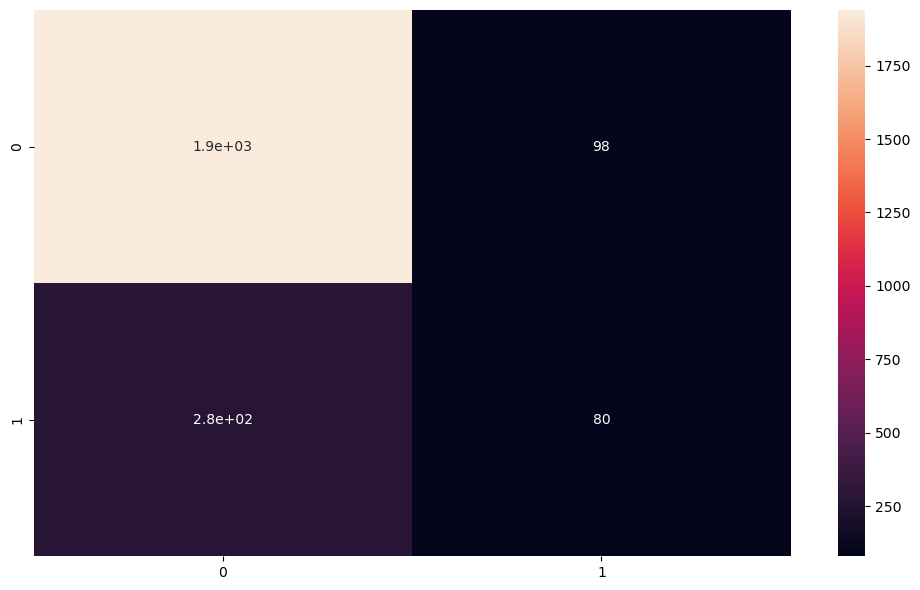

In [535]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

### Random forest model

This code trains a random forest classifier on the training data using the RandomForestClassifier class from scikit-learn. Random forest is an ensemble learning method that constructs multiple decision trees and combines their predictions to make a final prediction. The trained random forest model is used to make predictions on the testing data.

In [536]:
from sklearn.ensemble import RandomForestClassifier

In [537]:
randForest = RandomForestClassifier(n_estimators=100)

In [538]:
randForest.fit(X_train, y_train)

RandomForestClassifier()

## Evaluation

This section calculates the accuracy score, classification report, and confusion matrix for the random forest model's predictions on the testing data. The evaluation metrics provide insights into the performance of the random forest model in predicting employee turnover.

In [539]:
randForest_predictions = randForest.predict(X_test)

In [540]:
accuracy_score(y_test, randForest_predictions)

0.9866611087953314

In [541]:
print(classification_report(y_test, randForest_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2037
           1       0.99      0.92      0.95       362

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399



In [542]:
cm = confusion_matrix(y_test, randForest_predictions)

In [543]:
cm

array([[2034,    3],
       [  29,  333]], dtype=int64)

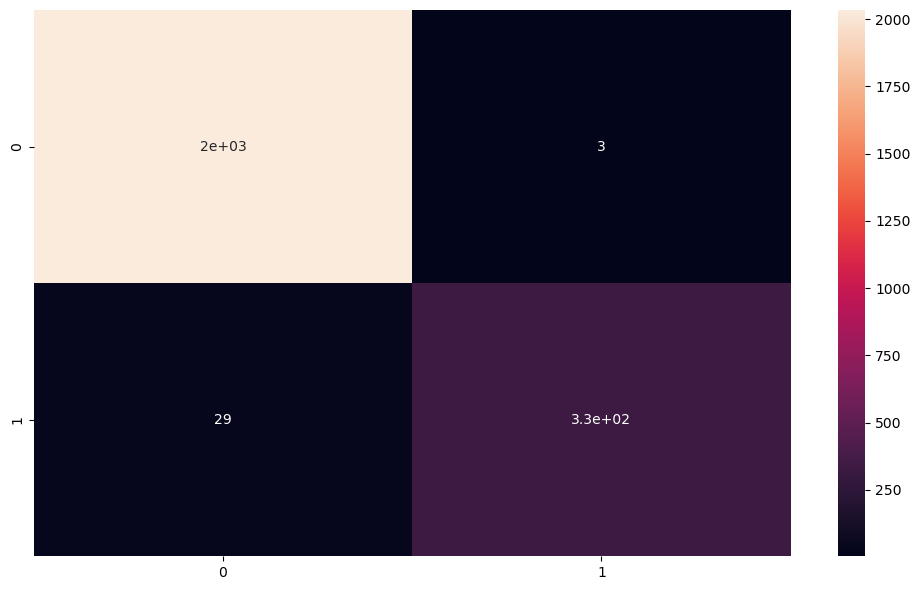

In [544]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

## Hyperparameter tuning

This section performs hyperparameter tuning for the random forest model using grid search and cross-validation. Hyperparameters are parameters that are not learned from the data but set before training the model. Grid search exhaustively searches the specified parameter grid and selects the best combination of hyperparameters based on cross-validation performance. The best hyperparameters and their corresponding performance scores are displayed.

In [545]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [546]:
parameter = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 100, 150, 200],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'] 
}

In [547]:
kfold = StratifiedKFold(n_splits=5)

In [548]:
clf = GridSearchCV(randForest, parameter, scoring='accuracy', n_jobs=2, cv=kfold)

In [549]:
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [10, 100, 150, 200]},
             scoring='accuracy')

In [550]:
clf.get_params()

{'cv': StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': 2,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'n_estimators': [10, 100, 150, 200],
  'min_samples_leaf': [1, 2, 4, 6],
  'max_features': ['auto', 'sqrt', 'log2']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 '

In [551]:
clf.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 150}

In [552]:
clf.best_score_

0.9829028740094798

In [553]:
clf.score(X_test, y_test)

0.9870779491454773

### Model saving

The trained random forest model is saved using the pickle library. The model is serialized and saved in a file named "model.pkl". Saving the model allows us to reuse it later without retraining, making it convenient for future predictions.

In [554]:
import pickle

In [555]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

## Conclusion

This project provides a comprehensive analysis of employee turnover using data analysis techniques and machine learning models. It helps gain insights into various factors influencing employee turnover and builds a predictive model for identifying employees at risk of leaving the company. The code covers data loading, exploratory data analysis, data preprocessing, model training, evaluation, hyperparameter tuning, and model saving. By following the code and its explanations, users can understand the process and apply it to their own employee turnover prediction tasks and modify the code to fit their specific dataset.